In [6]:
import os, sys
os.chdir('/home/koritskiy/rqc/hamiltonian_learning')

from random import seed

from modules.main import *
import matplotlib.pyplot as plt

In [5]:
def double_plot(Y1, Y2, Y1_name=None, Y2_name=None):

    X = range(len(Y1))
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('iterations')
    if Y1_name:
        ax1.set_ylabel(Y1_name, color=color)
    else:
        ax1.set_ylabel("Y1", color=color)
    ax1.scatter(X, Y1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    if Y1_name:
        ax2.set_ylabel(Y2_name, color=color)
    else:
        ax2.set_ylabel("Y2", color=color)  # we've already handled the x-label with ax1
    ax2.scatter(X, Y2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.show()

In [7]:
# Some initial parameters
np.random.seed(43)
seed(43)

n_spins = 1
beta = 100
cycles = 1000

lr = 0.02
gradient_iterations = 1

# Create initial random basis angles
theta = np.random.rand(n_spins) * np.pi
phi = np.random.rand(n_spins) * 2 * np.pi
# theta = np.array([0.])
# phi = np.array([0.])

angles = np.array([theta, phi]).T

# Create target hamiltonian
# x_t = np.random.rand(n_spins) * 2 - 1
# z_t = np.random.rand(n_spins) * 2 - 1
z_t = [-1]
x_t = [0]
z_g = [0]
x_g = [-1]

hamiltonian_t = Hamiltonian(n_spins, beta, z=z_t, x=x_t)
hamiltonian_t.set_density_mat()
hamiltonian_g = Hamiltonian(n_spins, beta, z=z_g, x=x_g)
hamiltonian_g.set_density_mat()

array([[0.5+0.j, 0.5+0.j],
       [0.5+0.j, 0.5+0.j]])

In [18]:
X = np.linspace(1, cycles, cycles)
Theta = np.zeros(cycles)
Phi = np.zeros(cycles)
Distance = np.zeros(cycles)

for i in range(cycles):
    grad = Gradient(hamiltonian_t, hamiltonian_g, angles)
    angles = grad.gradient_descent(lr=lr, num_iterations=gradient_iterations)
    singles_t = hamiltonian_t.measure(angles)
    singles_g = hamiltonian_g.measure(angles)

    print(f"singles_t {singles_t}")
    print(f"singles_g {singles_g}")
    print(f"distance {distance_by_measurements(singles_g, singles_t)}")
    print(f"theta {angles[0, 0] % np.pi}")
    print(f"phi {angles[0, 1] % (2 * np.pi)}")
    print(' ')

    Theta[i] = angles[0, 0] / np.pi
    Phi[i] = angles[0, 1] /np.pi
    Distance[i] = distance_by_measurements(singles_g, singles_t)

singles_t [[0.96689471 0.03310529]]
singles_g [[0.36193882 0.63806118]]
distance 0.3659716362786578
theta 0.36593550078701814
phi 3.8309215464038497
 
singles_t [[0.96610497 0.03389503]]
singles_g [[0.36083424 0.63916576]]
distance 0.36635266016373175
theta 0.37032454172201956
phi 3.8350419172474726
 
singles_t [[0.96532302 0.03467698]]
singles_g [[0.35978708 0.64021292]]
distance 0.3666737732907508
theta 0.37462189357635484
phi 3.8392381145206387
 
singles_t [[0.9645494 0.0354506]]
singles_g [[0.35879716 0.64120284]]
distance 0.3669357798570307
theta 0.3788277808692858
phi 3.843509173219426
 
singles_t [[0.9637846 0.0362154]]
singles_g [[0.35786422 0.64213578]]
distance 0.36713951010081414
theta 0.38294246102770363
phi 3.8478540935695182
 
singles_t [[0.9630291 0.0369709]]
singles_g [[0.356988 0.643012]]
distance 0.36728581878410577
theta 0.3869662230311819
phi 3.8522718425489835
 
singles_t [[0.96228337 0.03771663]]
singles_g [[0.35616822 0.64383178]]
distance 0.36737558372156476
the

singles_t [[0.9450341 0.0549659]]
singles_g [[0.40800183 0.59199817]]
distance 0.28840365350341646
theta 0.47330157173569487
phi 4.2968823215069145
 
singles_t [[0.9452702 0.0547298]]
singles_g [[0.40948401 0.59051599]]
distance 0.28706684748525324
theta 0.47226458156034606
phi 4.303100879641129
 
singles_t [[0.94551491 0.05448509]]
singles_g [[0.41096763 0.58903237]]
distance 0.28574080099390814
theta 0.47118756600212053
phi 4.309300868384903
 
singles_t [[0.94576804 0.05423196]]
singles_g [[0.41245207 0.58754793]]
distance 0.28442592039168557
theta 0.47007112475032886
phi 4.315481591317224
 
singles_t [[0.94602938 0.05397062]]
singles_g [[0.41393672 0.58606328]]
distance 0.28312259598368794
theta 0.46891585166714594
phi 4.321642369310129
 
singles_t [[0.94629875 0.05370125]]
singles_g [[0.41542098 0.58457902]]
distance 0.28183120220111385
theta 0.4677223347753549
phi 4.327782540363776
 
singles_t [[0.94657595 0.05342405]]
singles_g [[0.41690426 0.58309574]]
distance 0.280552097795021

singles_t [[0.97940893 0.02059107]]
singles_g [[0.50130102 0.49869898]]
distance 0.22858717694053582
theta 0.28798590557246245
phi 4.721550520393302
 
singles_t [[0.97980466 0.02019534]]
singles_g [[0.50176348 0.49823652]]
distance 0.2285233714177336
theta 0.2851860503797018
phi 4.724925789242667
 
singles_t [[0.98019732 0.01980268]]
singles_g [[0.50221157 0.49778843]]
distance 0.22847038128085081
theta 0.2823812286899647
phi 4.728263485835908
 
singles_t [[0.98058685 0.01941315]]
singles_g [[0.50264541 0.49735459]]
distance 0.22842802508344162
theta 0.27957173831106324
phi 4.731563652337339
 
singles_t [[0.98097318 0.01902682]]
singles_g [[0.50306512 0.49693488]]
distance 0.2283961205361472
theta 0.27675787620341125
phi 4.734826334057274
 
singles_t [[0.98135626 0.01864374]]
singles_g [[0.50347083 0.49652917]]
distance 0.22837448456780549
theta 0.27393993849632525
phi 4.73805157943009
 
singles_t [[0.98173601 0.01826399]]
singles_g [[0.50386267 0.49613733]]
distance 0.2283629333859737

singles_t [[9.99416103e-01 5.83896658e-04]]
singles_g [[0.50420204 0.49579796]]
distance 0.24523696520637503
theta 0.04833261171698347
phi 4.887226330079529
 
singles_t [[9.99468024e-01 5.31975535e-04]]
singles_g [[0.50402218 0.49597782]]
distance 0.2454665807999222
theta 0.04613328060236628
phi 4.8877201170045
 
singles_t [[9.99517184e-01 4.82816239e-04]]
singles_g [[0.50384211 0.49615789]]
distance 0.2456937791642562
theta 0.04394969684009085
phi 4.888190675096702
 
singles_t [[9.99563630e-01 4.36369746e-04]]
singles_g [[0.50366192 0.49633808]]
distance 0.2459185047230213
theta 0.04178196902457963
phi 4.888638239114925
 
singles_t [[9.99607413e-01 3.92586847e-04]]
singles_g [[0.50348172 0.49651828]]
distance 0.24614070434386756
theta 0.03963020223286765
phi 4.889063043934944
 
singles_t [[9.99648582e-01 3.51418173e-04]]
singles_g [[0.5033016 0.4966984]]
distance 0.24636032731735075
theta 0.037494498028207625
phi 4.889465324493852
 
singles_t [[9.99687186e-01 3.12814228e-04]]
singles_

theta 3.096617643732567
phi 4.8867804390552685
 
singles_t [[9.99464926e-01 5.35074040e-04]]
singles_g [[0.4959972 0.5040028]]
distance 0.253479747115588
theta 3.095325191955363
phi 4.88635545549313
 
singles_t [[9.99435027e-01 5.64972715e-04]]
singles_g [[0.49589717 0.50410283]]
distance 0.2535503717673653
theta 3.0940498667596814
phi 4.885918798511661
 
singles_t [[9.99404733e-01 5.95266974e-04]]
singles_g [[0.49579944 0.50420056]]
distance 0.2536182905695851
theta 3.0927916238726794
phi 4.8854706536928765
 
singles_t [[9.99374074e-01 6.25925719e-04]]
singles_g [[0.49570401 0.50429599]]
distance 0.2536835322235939
theta 3.0915504171465042
phi 4.885011205092416
 
singles_t [[9.99343082e-01 6.56918454e-04]]
singles_g [[0.49561088 0.50438912]]
distance 0.2537461259973049
theta 3.0903261986001884
phi 4.884540635234958
 
singles_t [[9.99311785e-01 6.88215282e-04]]
singles_g [[0.49552006 0.50447994]]
distance 0.2538061016943844
theta 3.089118918461353
phi 4.884059125110387
 
singles_t [[9.

singles_t [[0.99777266 0.00222734]]
singles_g [[0.49370921 0.50629079]]
distance 0.25407995972155
theta 3.047168170900692
phi 4.846231287269659
 
singles_t [[0.99775429 0.00224571]]
singles_g [[0.49372318 0.50627682]]
distance 0.2540473635891091
theta 3.046779392967705
phi 4.84538309736643
 
singles_t [[0.99773644 0.00226356]]
singles_g [[0.49373844 0.50626156]]
distance 0.2540139856682612
theta 3.046403027210671
phi 4.844531777172333
 
singles_t [[0.99771911 0.00228089]]
singles_g [[0.49375497 0.50624503]]
distance 0.2539798537631607
theta 3.046038978014005
phi 4.843677429499798
 
singles_t [[0.9977023 0.0022977]]
singles_g [[0.49377274 0.50622726]]
distance 0.25394499535004206
theta 3.0456871496751488
phi 4.8428201560908875
 
singles_t [[0.997686 0.002314]]
singles_g [[0.49379173 0.50620827]]
distance 0.25390943757437706
theta 3.04534744642009
phi 4.841960057628806
 
singles_t [[0.99767023 0.00232977]]
singles_g [[0.49381191 0.50618809]]
distance 0.25387320724827167
theta 3.045019772

singles_t [[0.99788185 0.00211815]]
singles_g [[0.49733231 0.50266769]]
distance 0.2505498419687815
theta 3.049513493920525
phi 4.770446862227358
 
singles_t [[0.99789755 0.00210245]]
singles_g [[0.49738017 0.50261983]]
distance 0.2505176491056166
theta 3.0498555658615047
phi 4.769616443823547
 
singles_t [[0.99791341 0.00208659]]
singles_g [[0.49742776 0.50257224]]
distance 0.25048589037293956
theta 3.0502024518568733
phi 4.7687887700873315
 
singles_t [[0.99792943 0.00207057]]
singles_g [[0.49747506 0.50252494]]
distance 0.25045456832263413
theta 3.0505540769119035
phi 4.7679638823307835
 
singles_t [[0.99794559 0.00205441]]
singles_g [[0.49752208 0.50247792]]
distance 0.25042368531858283
theta 3.050910366394968
phi 4.767141821369058
 
singles_t [[0.9979619 0.0020381]]
singles_g [[0.49756881 0.50243119]]
distance 0.25039324353949044
theta 3.0512712460379467
phi 4.766322627522596
 
singles_t [[0.99797834 0.00202166]]
singles_g [[0.49761523 0.50238477]]
distance 0.25036324498169615
the

singles_t [[9.99607012e-01 3.92988182e-04]]
singles_g [[0.50021017 0.49978983]]
distance 0.24939721056510966
theta 3.1019421972331243
phi 4.701785114253171
 
singles_t [[9.99616894e-01 3.83106408e-04]]
singles_g [[0.50021494 0.49978506]]
distance 0.24940231046526604
theta 3.1024439452490977
phi 4.701405219578552
 
singles_t [[9.99626626e-01 3.73373771e-04]]
singles_g [[0.50021944 0.49978056]]
distance 0.2494075336493301
theta 3.1029444841734346
phi 4.701029923776509
 
singles_t [[9.99636210e-01 3.63790011e-04]]
singles_g [[0.50022368 0.49977632]]
distance 0.2494128759540988
theta 3.103443780277176
phi 4.700659221143874
 
singles_t [[9.99645645e-01 3.54354826e-04]]
singles_g [[0.50022765 0.49977235]]
distance 0.24941833324796364
theta 3.103941800214814
phi 4.700293105626798
 
singles_t [[9.99654932e-01 3.45067880e-04]]
singles_g [[0.50023136 0.49976864]]
distance 0.24942390143178136
theta 3.104438511024142
phi 4.699931570822936
 
singles_t [[9.99664071e-01 3.35928795e-04]]
singles_g [[0

singles_t [[9.99994878e-01 5.12163229e-06]]
singles_g [[0.50006241 0.49993759]]
distance 0.24993247487322637
theta 3.1370664450091663
phi 4.68480908465494
 
singles_t [[9.99995579e-01 4.42098088e-06]]
singles_g [[0.50005808 0.49994192]]
distance 0.24993750590965216
theta 3.1373874247527107
phi 4.684764051347533
 
singles_t [[9.99996223e-01 3.77719671e-06]]
singles_g [[0.50005376 0.49994624]]
distance 0.24994246265132578
theta 3.137705648848872
phi 4.684722197670189
 
singles_t [[9.99996811e-01 3.18897228e-06]]
singles_g [[0.50004947 0.49995053]]
distance 0.24994734460745752
theta 3.138021112932967
phi 4.684683498431125
 
singles_t [[9.99997345e-01 2.65500825e-06]]
singles_g [[0.5000452 0.4999548]]
distance 0.2499521513248014
theta 3.1383338129375438
phi 4.684647928339736
 
singles_t [[9.99997826e-01 2.17401376e-06]]
singles_g [[0.50004095 0.49995905]]
distance 0.24995688238716413
theta 3.138643745090444
phi 4.684615462009947
 
singles_t [[9.99998255e-01 1.74470668e-06]]
singles_g [[0.5

singles_t [[9.99964415e-01 3.55846441e-05]]
singles_g [[0.49985745 0.50014255]]
distance 0.25010697923207
theta 0.011930643945130848
phi 4.688489283310486
 
singles_t [[9.99963698e-01 3.63021327e-05]]
singles_g [[0.49985674 0.50014326]]
distance 0.2501069645755384
theta 0.012050323145607472
phi 4.688609993513855
 
singles_t [[9.99962988e-01 3.70121543e-05]]
singles_g [[0.49985609 0.50014391]]
distance 0.25010690704310623
theta 0.012167598108084649
phi 4.688731929126135
 
singles_t [[9.99962286e-01 3.77143584e-05]]
singles_g [[0.49985549 0.50014451]]
distance 0.25010680749774356
theta 0.012282480621483545
phi 4.688855065806004
 
singles_t [[9.99961592e-01 3.84084067e-05]]
singles_g [[0.49985494 0.50014506]]
distance 0.2501066668025382
theta 0.012394982600992565
phi 4.688979379315942
 
singles_t [[9.99960906e-01 3.90939726e-05]]
singles_g [[0.49985443 0.50014557]]
distance 0.2501064858203487
theta 0.012505116085736215
phi 4.689104845523986
 
singles_t [[9.99960229e-01 3.97707417e-05]]
si

singles_t [[9.99941862e-01 5.81376411e-05]]
singles_g [[0.49989429 0.50010571]]
distance 0.2500475770474625
theta 0.01524975643192344
phi 4.698523852716785
 
singles_t [[9.99941968e-01 5.80319952e-05]]
singles_g [[0.49989556 0.50010444]]
distance 0.2500464074010367
theta 0.015235894172447553
phi 4.6986786520819255
 
singles_t [[9.99942084e-01 5.79157214e-05]]
singles_g [[0.49989684 0.50010316]]
distance 0.25004524206597517
theta 0.01522062278354148
phi 4.698833308626706
 
singles_t [[9.99942211e-01 5.77889699e-05]]
singles_g [[0.49989813 0.50010187]]
distance 0.2500440814299057
theta 0.01520395778959753
phi 4.698987807838622
 
singles_t [[9.99942348e-01 5.76518934e-05]]
singles_g [[0.49989942 0.50010058]]
distance 0.25004292587090365
theta 0.015185914704635813
phi 4.699142135366431
 
singles_t [[9.99942495e-01 5.75046468e-05]]
singles_g [[0.49990072 0.50009928]]
distance 0.25004177575752307
theta 0.01516650903079581
phi 4.699296277020143
 
singles_t [[9.99942653e-01 5.73473869e-05]]
si

singles_t [[9.99966223e-01 3.37770252e-05]]
singles_g [[0.49997731 0.50002269]]
distance 0.24998891638774684
theta 0.011623666453531533
phi 4.708484212670832
 
singles_t [[9.99966670e-01 3.33299244e-05]]
singles_g [[0.49997814 0.50002186]]
distance 0.24998853404698765
theta 0.011546479057602978
phi 4.708601786408795
 
singles_t [[9.99967117e-01 3.28834872e-05]]
singles_g [[0.49997895 0.50002105]]
distance 0.24998816390358825
theta 0.0114688879367291
phi 4.708718570583434
 
singles_t [[9.99967562e-01 3.24378285e-05]]
singles_g [[0.49997976 0.50002024]]
distance 0.24998780586550234
theta 0.01139090501940009
phi 4.708834561183883
 
singles_t [[9.99968007e-01 3.19930613e-05]]
singles_g [[0.49998055 0.50001945]]
distance 0.24998745983758788
theta 0.011312542154945997
phi 4.708949754323088
 
singles_t [[9.99968451e-01 3.15492962e-05]]
singles_g [[0.49998133 0.50001867]]
distance 0.24998712572170761
theta 0.011233811113093054
phi 4.70906414623694
 
singles_t [[9.99968893e-01 3.11066420e-05]]


singles_t [[9.99988680e-01 1.13195843e-05]]
singles_g [[0.50000539 0.49999461]]
distance 0.24998328895143282
theta 0.006728930668347242
phi 4.7139915490019275
 
singles_t [[9.99988959e-01 1.10410235e-05]]
singles_g [[0.50000555 0.49999445]]
distance 0.24998340918524586
theta 0.00664561933753012
phi 4.714059286705248
 
singles_t [[9.99989234e-01 1.07664438e-05]]
singles_g [[0.5000057 0.4999943]]
distance 0.24998353371550922
theta 0.0065624637060939465
phi 4.714126180265595
 
singles_t [[9.99989504e-01 1.04958483e-05]]
singles_g [[0.50000584 0.49999416]]
distance 0.2499836624066792
theta 0.006479470657370103
phi 4.714192231397304
 
singles_t [[9.99989771e-01 1.02292383e-05]]
singles_g [[0.50000598 0.49999402]]
distance 0.24998379512423055
theta 0.006396646988771521
phi 4.714257441883663
 
singles_t [[9.99990033e-01 9.96661403e-06]]
singles_g [[0.5000061 0.4999939]]
distance 0.24998393173469155
theta 0.006313999411961497
phi 4.714321813576003
 
singles_t [[9.99990292e-01 9.70797431e-06]]


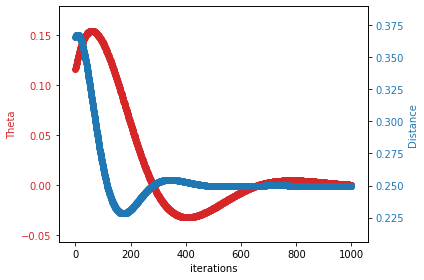

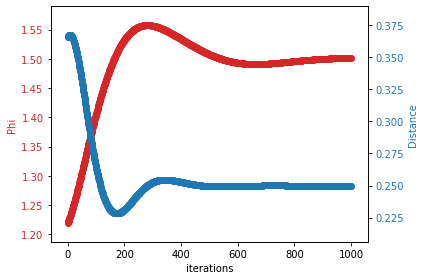

In [19]:
double_plot(Theta, Distance, "Theta", "Distance")
double_plot(Phi, Distance, "Phi", "Distance")

In [23]:
angles = np.array([[-np.pi/4, 0]])
singles_t = hamiltonian_t.measure(angles)
singles_g = hamiltonian_g.measure(angles)
distance_by_measurements(singles_g, singles_t)


0.4999999999999999

In [24]:
singles_t

array([[0.85355339, 0.14644661]])

In [25]:
singles_g

array([[0.14644661, 0.85355339]])